In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)

from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score

from sklearn.preprocessing import LabelBinarizer


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


In [2]:
eclipse_jdt = pd.read_csv("Eclipse_ JDT_Core_single-version-ck-oo_bugs_only.csv",delimiter=';')
eclipse_pdt = pd.read_csv("Eclipse_PDE_UI_single-version-ck-oo_bug_only.csv",delimiter=';')
equinox = pd.read_csv("Equinox_Framework_single-version-ck-oo_bug_only.csv",delimiter=';')
lucene = pd.read_csv("Lucene_single-version-ck-oo_bug_only.csv",delimiter=';')
mylyn = pd.read_csv("Mylyn_single-version-ck-oo_bug_only.csv",delimiter=';')

In [3]:
print("NaNs in eclipse_jdt", np.sum(np.sum(eclipse_jdt.isna(), axis=0)) )
print("NaNs in eclipse_pdt", np.sum(np.sum(eclipse_pdt.isna(), axis=0)) )
print("NaNs in equinox", np.sum(np.sum(equinox.isna(), axis=0)) )
print("NaNs in lucene", np.sum(np.sum(lucene.isna(), axis=0)) )
print("NaNs in mylyn", np.sum(np.sum(mylyn.isna(), axis=0)) )

# drop nans
eclipse_pdt.dropna(axis = 1, inplace=True)
equinox.dropna(axis = 1, inplace=True)
lucene.dropna(axis = 1, inplace=True)
mylyn.dropna(axis = 1, inplace=True)

NaNs in eclipse_jdt 0
NaNs in eclipse_pdt 0
NaNs in equinox 0
NaNs in lucene 0
NaNs in mylyn 0


In [4]:
print("Data Shapes:", eclipse_jdt.shape, eclipse_pdt.shape, equinox.shape, lucene.shape, mylyn.shape)
df = pd.concat([eclipse_jdt, eclipse_pdt, equinox, lucene, mylyn], ignore_index=True)
df.columns = df.columns.str.replace(' ', '')
print("Full dataframe shape:",df.shape, '\n')
print("Predictors:")
for name in df.columns.values[:23].tolist():
    print(name, end=', ')
print("\n\nPredictable:", df.columns.values[23])
df.head()

Data Shapes: (997, 24) (1497, 24) (324, 24) (691, 24) (1862, 24)
Full dataframe shape: (5371, 24) 

Predictors:
classname, cbo, dit, fanIn, fanOut, lcom, noc, numberOfAttributes, numberOfAttributesInherited, numberOfLinesOfCode, numberOfMethods, numberOfMethodsInherited, numberOfPrivateAttributes, numberOfPrivateMethods, numberOfPublicAttributes, numberOfPublicMethods, rfc, wmc, bugs, nonTrivialBugs, majorBugs, criticalBugs, highPriorityBugs, 

Predictable: 


,classname,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,...,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs,
0,org::eclipse::jdt::internal::core::search::ind...,9,2,1,9,15,0,1,8,122.0,...,1.0,5,34.0,20.0,0,0,0,0,0,
1,org::eclipse::jdt::internal::compiler::codegen...,1,1,1,0,0,0,2,0,4.0,...,2.0,1,1.0,1.0,0,0,0,0,0,
2,org::eclipse::jdt::internal::compiler::ast::AS...,114,1,102,18,190,6,131,249,484.0,...,3.0,19,156.0,176.0,1,0,0,0,0,
3,org::eclipse::jdt::internal::compiler::lookup:...,5,6,1,4,10,0,0,61,33.0,...,0.0,4,18.0,12.0,0,0,0,0,0,
4,org::eclipse::jdt::internal::eval::CodeSnippet...,23,2,1,22,820,0,7,416,673.0,...,7.0,1,174.0,115.0,0,0,0,0,0,


In [5]:
df.describe()

,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,...,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs
count,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,...,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000
mean,9.650717,1.948985,4.077825,5.808229,131.440328,0.548687,5.648110,20.607522,119.126233,9.465649,...,1.515733,1.588903,6.271272,47.397133,28.291380,0.259914,0.041147,0.021225,0.003724,0.007261
std,15.430910,1.339559,12.763334,7.413065,1419.297581,2.320663,32.421878,75.447749,305.121926,13.519683,...,4.259624,30.836387,10.583760,100.978959,69.140371,0.880067,0.266681,0.158895,0.060914,0.089189
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,18.000000,3.000000,...,0.000000,0.000000,2.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1.000000,1.000000,3.000000,15.000000,0.000000,2.000000,0.000000,47.000000,6.000000,...,0.000000,0.000000,4.000000,21.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,2.000000,3.000000,8.000000,55.000000,0.000000,5.000000,2.000000,115.000000,11.000000,...,1.000000,0.000000,7.000000,51.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,362.000000,9.000000,355.000000,93.000000,81003.000000,49.000000,2169.000000,563.000000,7509.000000,403.000000,...,111.000000,2168.000000,387.000000,2603.000000,1680.000000,28.000000,8.000000,3.000000,1.000000,2.000000


In [6]:
# Shuffle data before removing classname to keep mapping
df = df.sample(frac=1.0)

# We do not need confusing variables such as the class name; We can use it as an index or leave it.
X = df.iloc[:, 1:-6]
y = df["bugs"]

print("X:", X.shape)
print("y:", y.shape)

X: (5371, 17)
y: (5371,)


In [7]:
X.head()

,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,numberOfMethodsInherited,numberOfPrivateAttributes,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc
3486,1,1,1,0,0,1,2,0,4.0,1.0,18,0,0,2.0,1,1.0,1.0
1638,4,2,3,1,190,0,8,6,97.0,20.0,35,8,0,0.0,20,25.0,20.0
2658,1,1,1,0,0,0,0,0,0.0,1.0,7,0,0,0.0,1,1.0,0.0
3268,5,2,0,5,3,0,2,0,35.0,3.0,15,1,0,0.0,3,15.0,6.0
514,2,2,1,1,3,0,1,68,11.0,3.0,33,0,0,0.0,2,4.0,3.0


In [8]:
y.head()

,bugs
3486,0
1638,0
2658,0
3268,0
514,0


In [9]:
#y = pd.Series([1, 3, 4, 2, 5])

# Replace values greater than 2 with 2
y = pd.Series(np.where(y > 2, 2, y))
#print(y)

In [10]:
print("X:", X.shape)
print("y:", y.shape)

X: (5371, 17)
y: (5371,)


In [11]:
print("Indices of y:", y.index)
print("Indices of X:", X.index)

common_indices = y.index.intersection(X.index)
print("Common indices:", common_indices)
print("Number of common indices:", len(common_indices))


Indices of y: RangeIndex(start=0, stop=5371, step=1)
Indices of X: Index([3486, 1638, 2658, 3268,  514, 4476, 1804, 2905,  816, 4858,
       ...
       3039, 2220, 4449, 4013, 1460, 3518, 4531, 3628, 3338, 4376],
      dtype='int64', length=5371)
Common indices: RangeIndex(start=0, stop=5371, step=1)
Number of common indices: 5371


Classes: [0, 1, 2]
Counts: [4518, 598, 255]


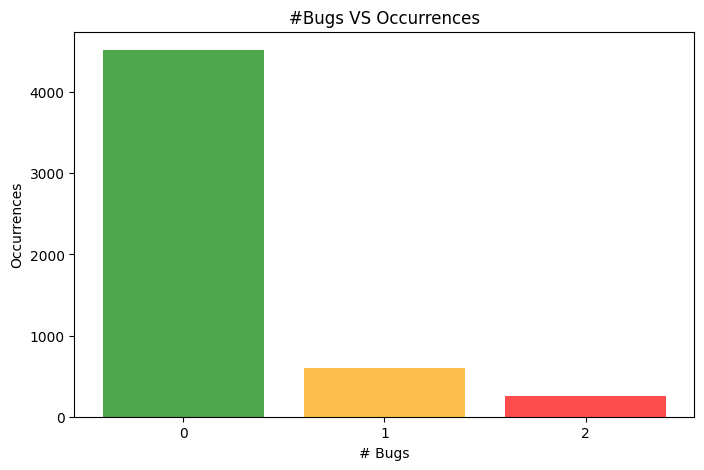

In [12]:
unique, counts = np.unique(y, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5)
print("Train:", X_train.shape, y_train.shape,
      "Test:", X_test.shape, y_test.shape,
      "Cross Validation", X_cv.shape, y_cv.shape)

Train: (3759, 17) (3759,) Test: (806, 17) (806,) Cross Validation (806, 17) (806,)


Classes: [0, 1, 2]
Counts: [3158, 430, 171]


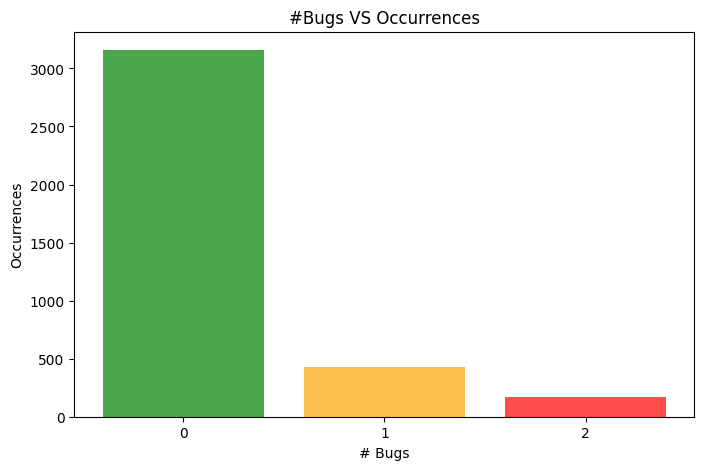

In [14]:
unique, counts = np.unique(y_train, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [15]:
X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test.values), columns=X_test.columns, index=X_test.index)

data_for_viz = X_train_scaled.copy()
data_for_viz_unscaled = X_train.copy()

data_for_viz['Bugs'] = y_train.copy().tolist()
data_for_viz_unscaled['Bugs'] = y_train.copy().tolist()

In [ ]:
data_for_viz.head()

,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,numberOfMethodsInherited,numberOfPrivateAttributes,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,Bugs
3291,-0.312747,0.784305,-0.250924,-0.242719,-0.083552,-0.234239,-0.312125,-0.260427,-0.312115,-0.451507,-0.242158,-0.335836,-0.370407,-0.142249,-0.281839,-0.376683,-0.310437,0
4267,-0.312747,0.031637,-0.336570,-0.107572,-0.079369,-0.234239,-0.091349,-0.167135,-0.155711,-0.311956,-0.029257,0.277579,-0.124798,-0.142249,-0.195221,-0.141844,-0.223431,0
1013,-0.660173,-0.721032,-0.336570,-0.783310,-0.085345,-0.234239,5.575237,-0.273754,-0.382337,-0.660832,-0.620649,-0.335836,-0.370407,9.963355,-0.541696,-0.464748,-0.411943,0
2383,-0.312747,-0.721032,-0.336570,-0.107572,-0.085345,-0.234239,-0.385717,-0.273754,-0.235509,-0.591057,-0.620649,-0.540308,-0.370407,-0.142249,-0.455077,-0.317974,-0.382941,1
689,-0.312747,4.547650,-0.165277,-0.242719,-0.068612,-0.234239,-0.091349,0.659157,-0.241893,-0.102630,5.529834,0.277579,-0.370407,-0.142249,0.064636,-0.278834,-0.252433,0


In [16]:
data_for_viz_unscaled.head()

,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,numberOfMethodsInherited,numberOfPrivateAttributes,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,Bugs
447,2,1,1,1,3,0,2,0,24.0,3.0,10,2,0,0.0,3,11.0,7.0,0
1703,4,1,0,4,10,0,1,0,58.0,5.0,6,1,1,0.0,4,32.0,13.0,0
1160,5,5,4,1,3,0,1,4,9.0,3.0,64,1,0,0.0,3,5.0,3.0,0
1859,14,3,0,14,136,0,8,0,272.0,17.0,14,8,4,0.0,13,82.0,38.0,1
668,0,1,0,0,1,0,0,0,6.0,2.0,8,0,1,0.0,1,3.0,2.0,0


## Data Visualization

In [ ]:
data_for_viz_unscaled.head()

,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,numberOfMethodsInherited,numberOfPrivateAttributes,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,Bugs
1385,7,1,3,5,105,3,3,0,179.0,15.0,6,3,3,0.0,8,51.0,41.0,1
1846,51,2,41,10,2080,3,14,7,457.0,65.0,62,11,7,0.0,47,195.0,109.0,2
4883,3,1,0,3,10,0,1,0,25.0,5.0,0,1,0,0.0,5,14.0,8.0,0
2619,7,1,7,0,6,4,2,0,14.0,4.0,10,2,0,0.0,2,4.0,5.0,1
3027,4,1,1,3,28,0,2,0,171.0,8.0,9,2,6,0.0,1,123.0,58.0,0


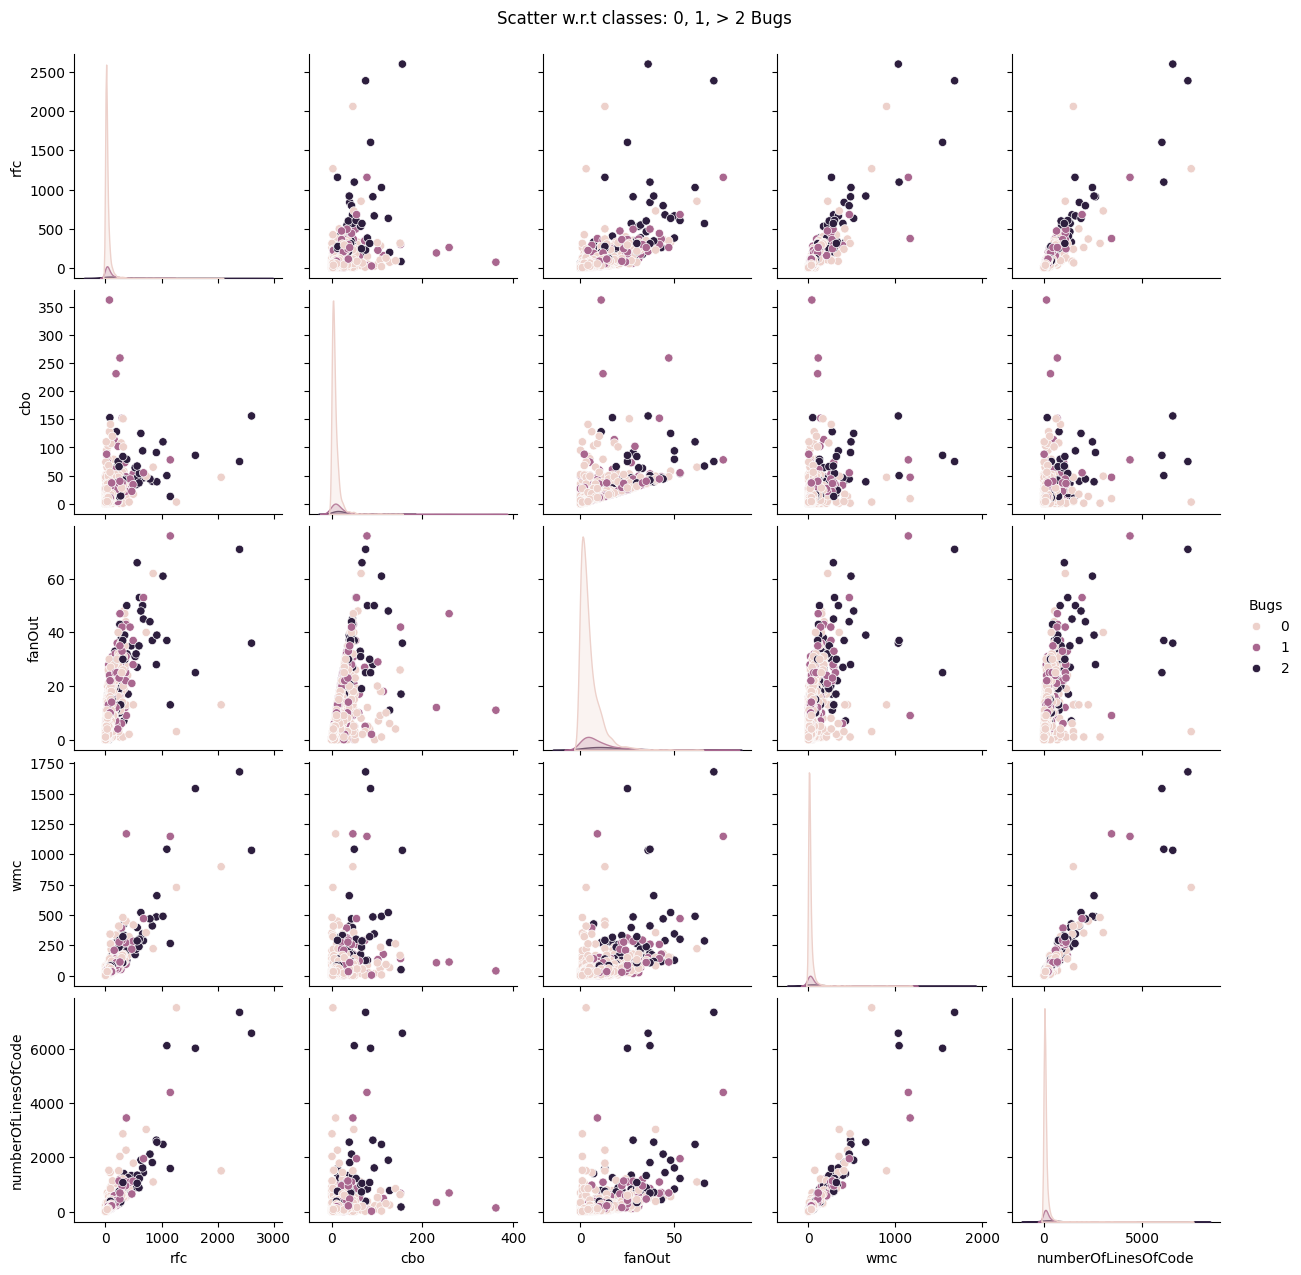

In [ ]:
#The code generates a pair plot
for_pair_plot = data_for_viz_unscaled[['rfc', 'cbo', 'fanOut','wmc', 'numberOfLinesOfCode', 'Bugs']]
pairplot = sns.pairplot(for_pair_plot, hue="Bugs", vars=['rfc', 'cbo', 'fanOut', 'wmc', 'numberOfLinesOfCode']);
pairplot.fig.suptitle("Scatter w.r.t classes: 0, 1, > 2 Bugs", y=1.02);

<ipython-input-25-3be382b5ca4d>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 0), 'rfc'], color='g', shade=True, label='0 Bugs')
<ipython-input-25-3be382b5ca4d>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 1), 'rfc'], color='orange', shade=True, label='1 Bug')
<ipython-input-25-3be382b5ca4d>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 2), 'rfc'], color='r', shade=True, label='> 2 Bugs')


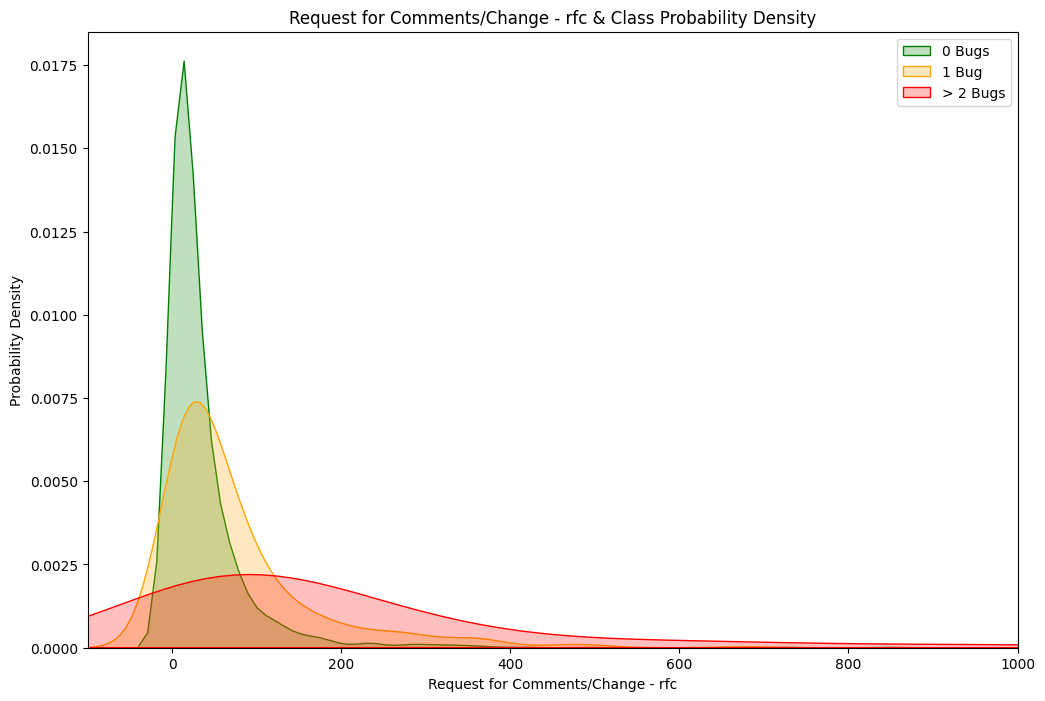

In [ ]:
#The code creates a Kernel Density Estimate (KDE)
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Plot KDEs for different bug classes
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 0), 'rfc'], color='g', shade=True, label='0 Bugs')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 1), 'rfc'], color='orange', shade=True, label='1 Bug')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 2), 'rfc'], color='r', shade=True, label='> 2 Bugs')

# Add labels and title
plt.xlabel('Request for Comments/Change - rfc')
plt.ylabel('Probability Density')
plt.title("Request for Comments/Change - rfc & Class Probability Density")

# Add legend
plt.legend()

# Set x-axis limits
plt.xlim(-100, 1000)

# Show plot
plt.show()


<ipython-input-26-22374061d9bf>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 0), 'cbo'], color='g', shade=True, label='0 Bugs')
<ipython-input-26-22374061d9bf>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 1), 'cbo'], color='orange', shade=True, label='1 Bug')
<ipython-input-26-22374061d9bf>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 2), 'cbo'], color='r', shade=True, label='> 2 Bugs')


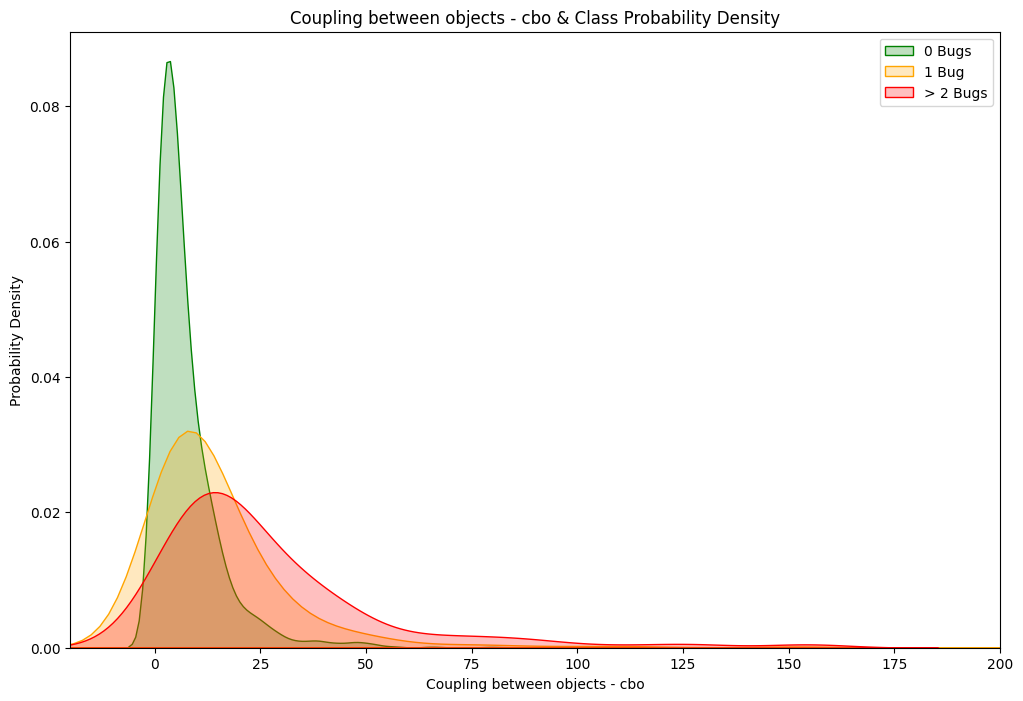

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Plot KDEs for different bug classes
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 0), 'cbo'], color='g', shade=True, label='0 Bugs')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 1), 'cbo'], color='orange', shade=True, label='1 Bug')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 2), 'cbo'], color='r', shade=True, label='> 2 Bugs')

# Add labels and title
plt.xlabel('Coupling between objects - cbo')
plt.ylabel('Probability Density')
plt.title("Coupling between objects - cbo & Class Probability Density")

# Add legend
plt.legend()

# Set x-axis limits
plt.xlim(-20, 200)

# Show plot
plt.show()


<ipython-input-27-96e9d0d9e9c5>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 0), 'fanOut'], color='g', shade=True, label='0 Bugs')
<ipython-input-27-96e9d0d9e9c5>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 1), 'fanOut'], color='orange', shade=True, label='1 Bug')
<ipython-input-27-96e9d0d9e9c5>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 2), 'fanOut'], color='r', shade=True, label='> 2 Bugs')


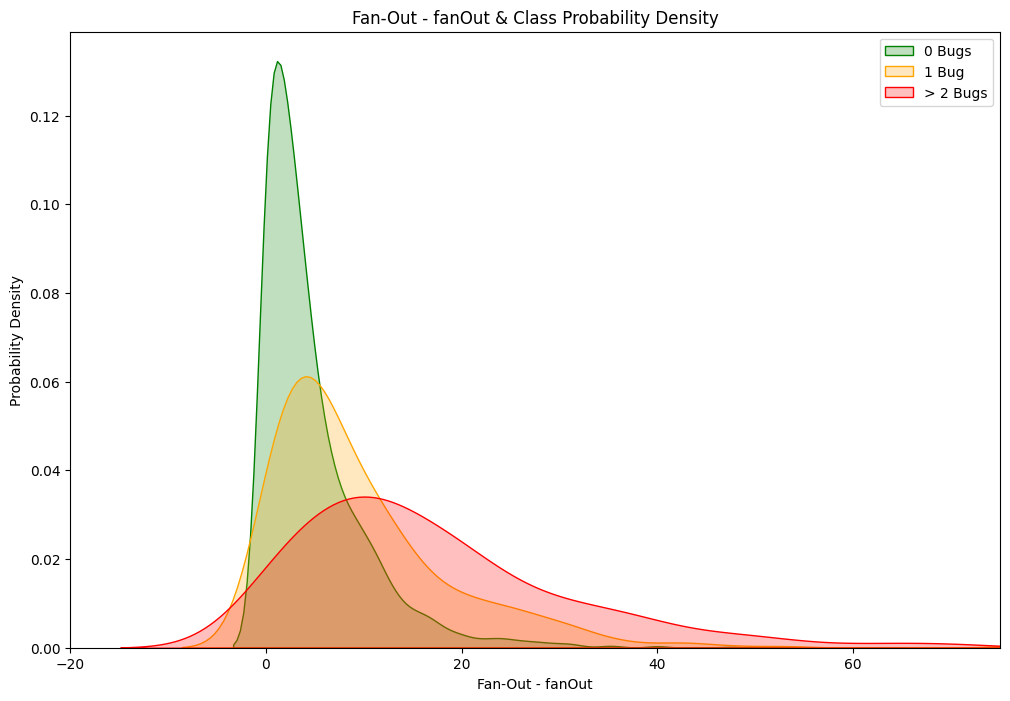

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Plot KDEs for different bug classes
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 0), 'fanOut'], color='g', shade=True, label='0 Bugs')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 1), 'fanOut'], color='orange', shade=True, label='1 Bug')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 2), 'fanOut'], color='r', shade=True, label='> 2 Bugs')

# Add labels and title
plt.xlabel('Fan-Out - fanOut')
plt.ylabel('Probability Density')
plt.title("Fan-Out - fanOut & Class Probability Density")

# Add legend
plt.legend()

# Set x-axis limits
plt.xlim(-20, 75)

# Show plot
plt.show()


<ipython-input-28-913b3a207ed7>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 0), 'wmc'], color='g', shade=True, label='0 Bugs')
<ipython-input-28-913b3a207ed7>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 1), 'wmc'], color='orange', shade=True, label='1 Bug')
<ipython-input-28-913b3a207ed7>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 2), 'wmc'], color='r', shade=True, label='> 2 Bugs')


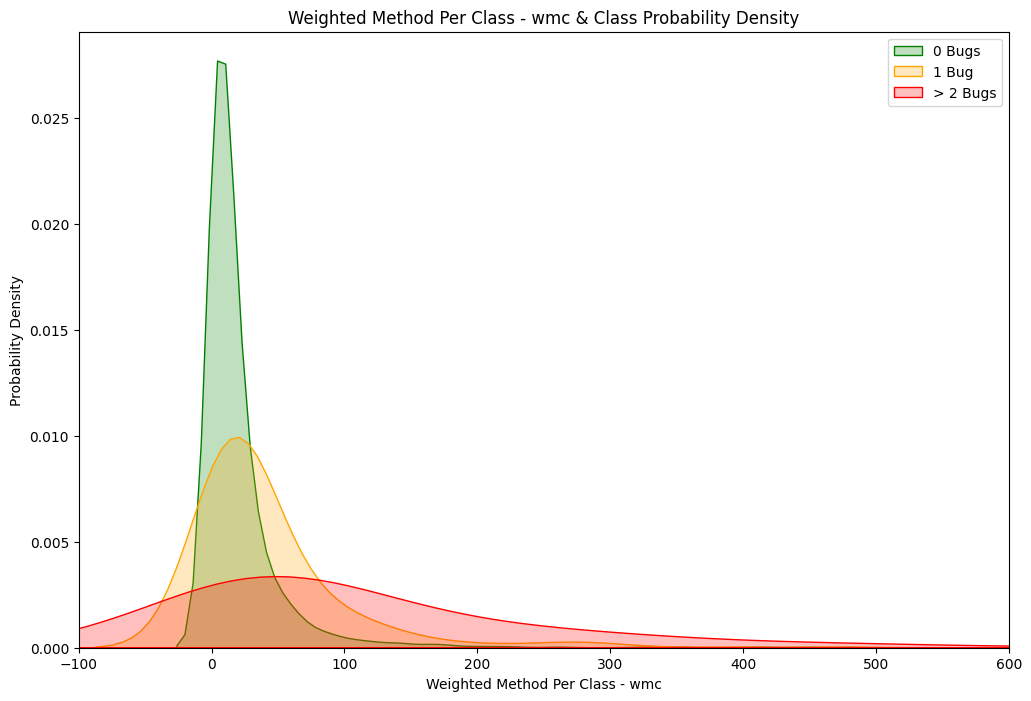

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Plot KDEs for different bug classes
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 0), 'wmc'], color='g', shade=True, label='0 Bugs')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 1), 'wmc'], color='orange', shade=True, label='1 Bug')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 2), 'wmc'], color='r', shade=True, label='> 2 Bugs')

# Add labels and title
plt.xlabel('Weighted Method Per Class - wmc')
plt.ylabel('Probability Density')
plt.title("Weighted Method Per Class - wmc & Class Probability Density")

# Add a legend
plt.legend()

# Set x-axis limits
plt.xlim(-100, 600)

# Show plot
plt.show()


<ipython-input-29-2fb8b43e65c3>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 0), 'numberOfLinesOfCode'], color='g', shade=True, label='0 Bugs')
<ipython-input-29-2fb8b43e65c3>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 1), 'numberOfLinesOfCode'], color='orange', shade=True, label='1 Bug')
<ipython-input-29-2fb8b43e65c3>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 2), 'numberOfLinesOfCode'], color='r', shade=True, label='> 2 Bugs

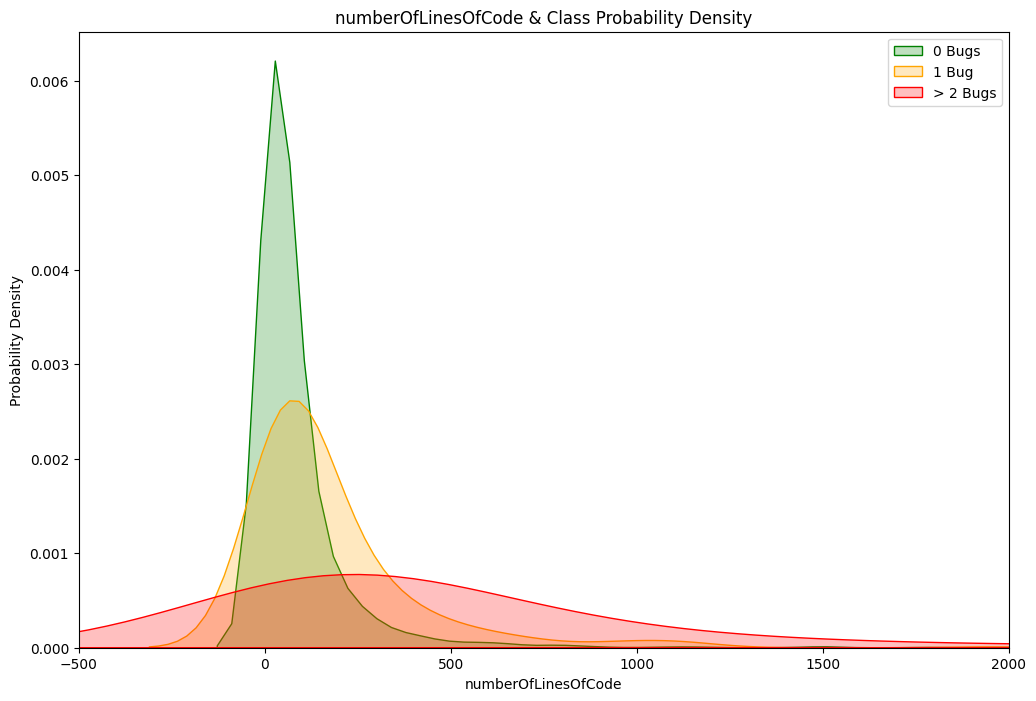

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
fig = plt.figure(figsize=(12, 8))

# Plot KDEs for different bug classes
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 0), 'numberOfLinesOfCode'], color='g', shade=True, label='0 Bugs')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 1), 'numberOfLinesOfCode'], color='orange', shade=True, label='1 Bug')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 2), 'numberOfLinesOfCode'], color='r', shade=True, label='> 2 Bugs')

# Add labels and title
plt.xlabel('numberOfLinesOfCode')
plt.ylabel('Probability Density')
plt.title("numberOfLinesOfCode & Class Probability Density")

# Set x-axis limits
plt.xlim(-500, 2000)

# Add a legend
plt.legend()

# Show plot
plt.show()


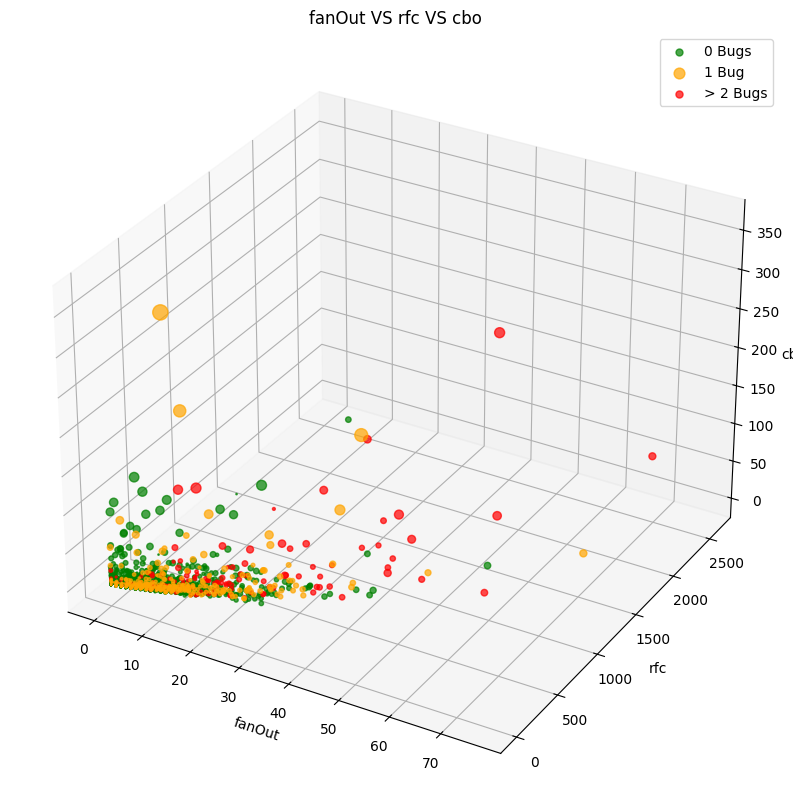

In [ ]:
#The code generates a 3D scatter plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure with a 3D axis
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for class '0 Bugs'
ax.scatter(data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 0]['fanOut'],
           data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 0]['rfc'],
           data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 0]['cbo'],
           c='g', s=data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 0]['cbo']/3, alpha=0.7, label='0 Bugs')

# Scatter plot for class '1 Bug'
ax.scatter(data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 1]['fanOut'],
           data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 1]['rfc'],
           data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 1]['cbo'],
           s=data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 1]['cbo']/3, alpha=0.7, c='orange', label='1 Bug')

# Scatter plot for class '> 2 Bugs'
ax.scatter(data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 2]['fanOut'],
           data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 2]['rfc'],
           data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 2]['cbo'],
           s=data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 2]['cbo']/3, alpha=0.7, c='r', label='> 2 Bugs')

# Add legend
ax.legend()

# Set labels and title
ax.set_xlabel('fanOut')
ax.set_ylabel('rfc')
ax.set_zlabel('cbo')
ax.set_title("fanOut VS rfc VS cbo")

# Show plot
plt.show()


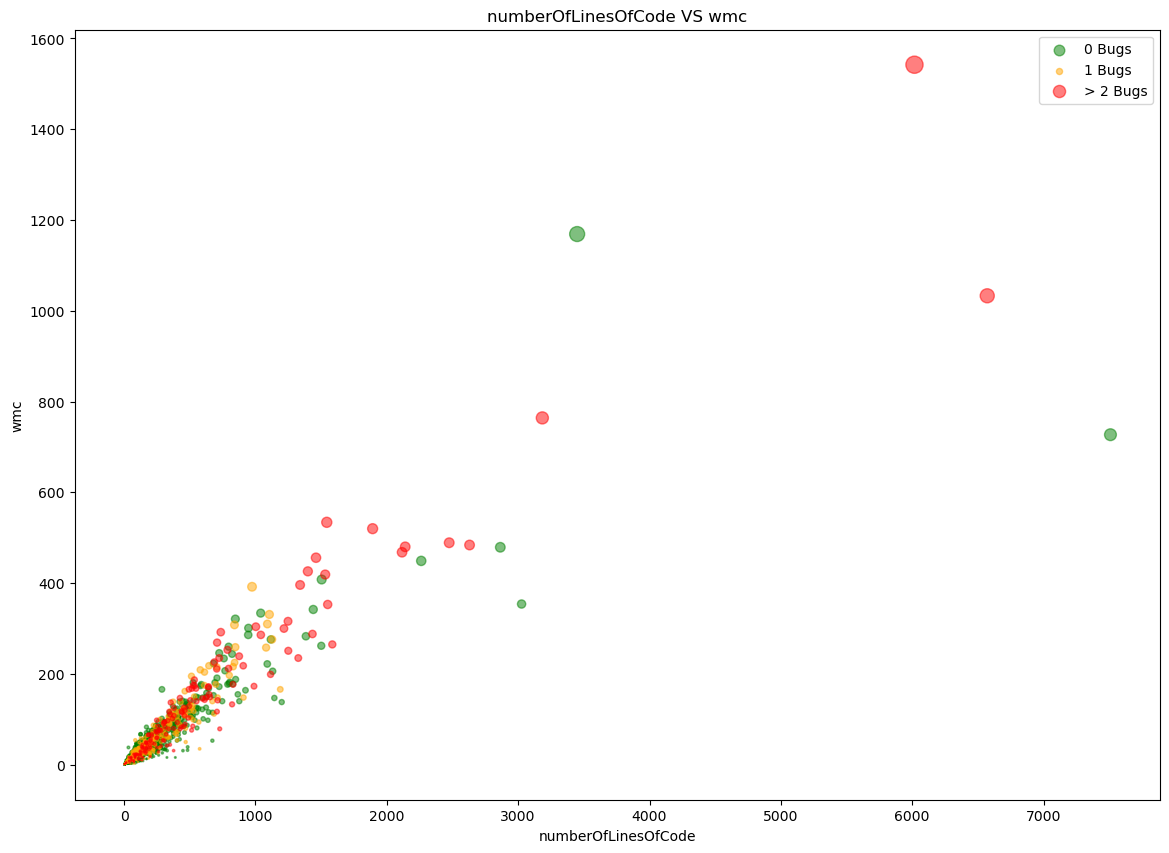

In [ ]:
#The code generates a scatter plot
plt.figure(figsize=(14,10))
plt.scatter(data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 0]['numberOfLinesOfCode'],
            data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 0]['wmc'], label='0 Bugs',
            s=data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 0]['wmc']/10, c='g',
           alpha=0.5)

plt.scatter(data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 1]['numberOfLinesOfCode'],
            data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 1]['wmc'], label='1 Bugs',
            s=data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 1]['wmc']/10, c='orange',
           alpha=0.5)

plt.scatter(data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 2]['numberOfLinesOfCode'],
            data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 2]['wmc'], label='> 2 Bugs',
            s=data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 2]['wmc']/10, c='r',
           alpha=0.5)

plt.legend()
plt.xlabel('numberOfLinesOfCode')
plt.ylabel('wmc')
plt.title("numberOfLinesOfCode VS wmc");

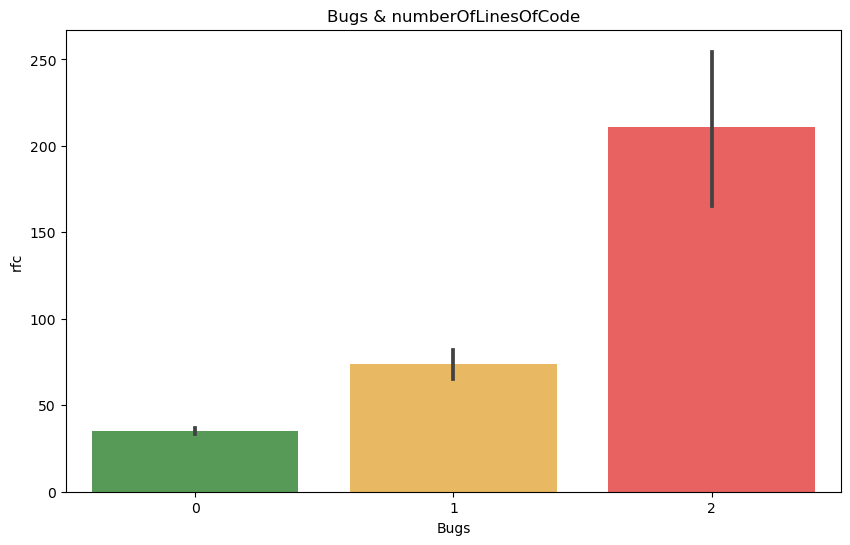

In [ ]:
fig = plt.figure(figsize=(10,6))


ax = sns.barplot(x="Bugs", y="rfc", data=for_pair_plot, alpha=0.7, palette=['g', 'orange', 'r'])
plt.title("Bugs & numberOfLinesOfCode");

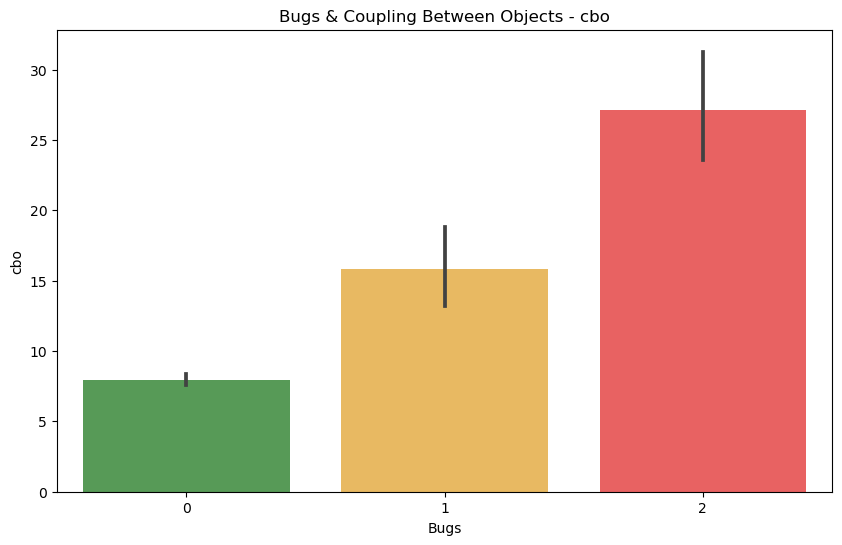

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="Bugs", y="cbo", data=for_pair_plot, alpha=0.7, palette=['g', 'orange', 'r'])
plt.title("Bugs & Coupling Between Objects - cbo");

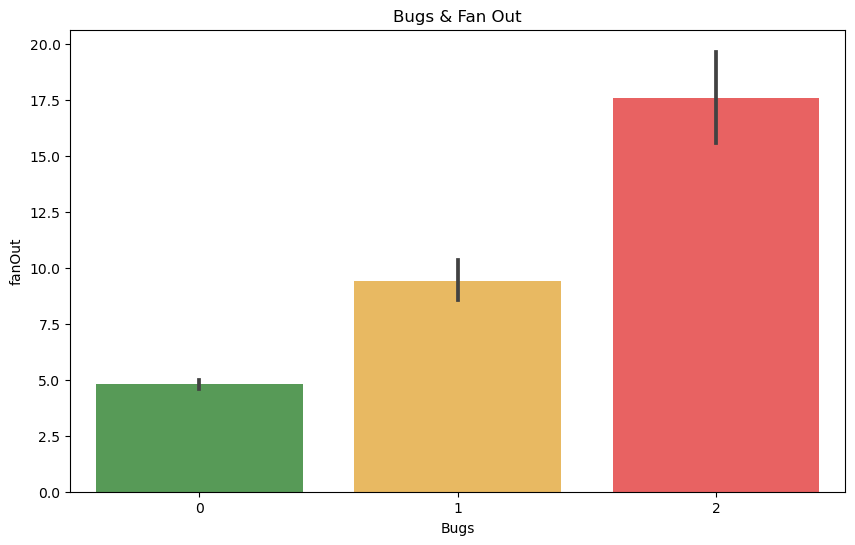

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="Bugs", y="fanOut", data=for_pair_plot, alpha=0.7, palette=['g', 'orange', 'r'])
plt.title("Bugs & Fan Out");

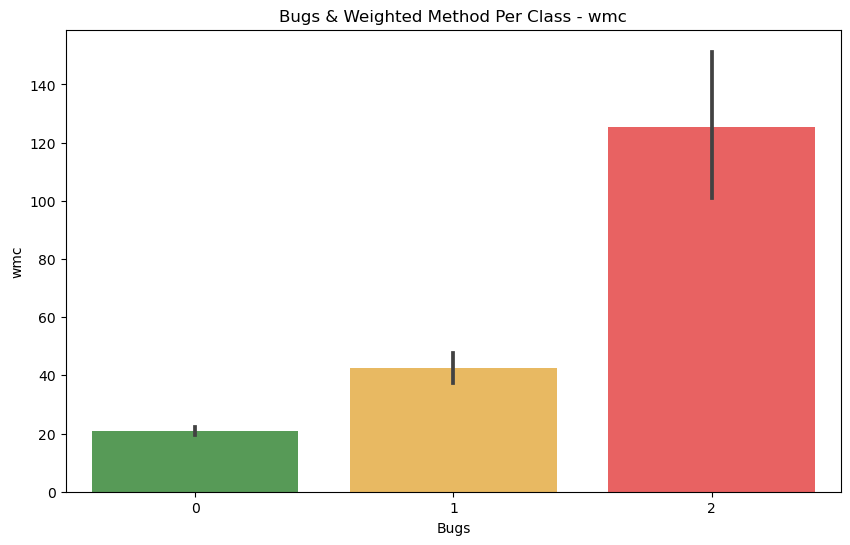

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="Bugs", y="wmc", data=for_pair_plot, alpha=0.7, palette=['g', 'orange', 'r'])
plt.title("Bugs & Weighted Method Per Class - wmc");

Text(0.5, 1.0, 'Bugs & numberOfLinesOfCode')

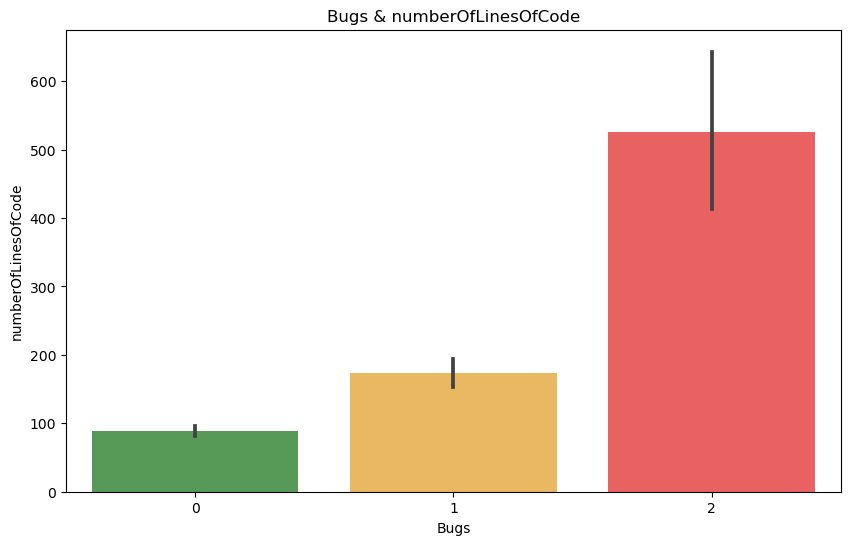

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="Bugs", y="numberOfLinesOfCode", data=for_pair_plot, alpha=0.7, palette=['g', 'orange', 'r'])
plt.title("Bugs & numberOfLinesOfCode")

## Modeling

In [17]:
X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test.values), columns=X_test.columns, index=X_test.index)

print("Train:", X_train.shape, y_train.shape,
      "Test:", X_test.shape, y_test.shape,
      "Cross Validation", X_cv.shape, y_cv.shape)

Train: (3759, 17) (3759,) Test: (806, 17) (806,) Cross Validation (806, 17) (806,)


In [18]:
def Modeler(model, X_train, y_train, X_cv, y_cv, params, scale=True, n_jobs=None, pca=False):

    if scale and pca:
        pipeline = Pipeline([
            ('scale', StandardScaler()),
            ('dim_reduct', PCA(n_components=4)),
            ('clf', model())])
        print("Scaling and dim reduct...")

    elif scale:
        pipeline = Pipeline([ ('scale', StandardScaler()), ('clf', model())])

    elif pca:
        pipeline = Pipeline([
        ('dim_reduct', PCA(n_components=pca)),
        ('clf', model())])
    else:
        pipeline = Pipeline([('clf', model())])

    # Handle n_jobs parameter only if model supports it
    if 'n_jobs' in model().get_params() and n_jobs is not None:
        grid = GridSearchCV(pipeline, param_grid=params, cv=3, n_jobs=n_jobs, refit=True)
    else:
        grid = GridSearchCV(pipeline, param_grid=params, cv=3, refit=True)

    grid.fit(X_cv, y_cv)

    best_parameters = {}
    for k, v in grid.best_params_.items():
        best_parameters[k[5:]] = v

    if 'n_jobs' in model().get_params() and n_jobs is not None:
        model = model(**best_parameters, n_jobs=n_jobs)
    else:
        model = model(**best_parameters)

    model.fit(X_train, y_train)

    print("Best Parameters for model:", best_parameters)

    return {
        "model": model,
        "best_params": best_parameters
    }


In [25]:
#Under Sampler Function
def model_eval(model, X_test, y_test, acc=True, auc_=True, plot_conf=True, plot_auc=True, multi=True, f1=True, prop=False):

    res = [None, None, None] # Accuracy, auc_roc, f1_score
    y_pred = model.predict(X_test)

    if prop:
        y_pred = np.where(y_pred > 0.5, 1, 0)

    if f1:
        f_sc = f1_score(y_test, y_pred, average='macro')
        res[2] = f_sc

    if acc:
        res[0] = accuracy_score(y_test, y_pred)
#         print('accuracy:', res[0] * 100 ,'%')

    if auc_:
        lb = LabelBinarizer()
        lb.fit(y_test)

        truth = lb.transform(y_test)
        y_pred_encode = lb.transform(y_pred)

        res[1] = roc_auc_score(truth, y_pred_encode, average = 'macro')
#         print('ROC:', res[1] * 100 ,'%')

    if plot_conf:
        fig, ax = plt.subplots(figsize=(10,6))

        conf = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
        sns.heatmap(conf, cmap= 'Set1', annot=True, cbar=False)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix');

    if plot_auc:
        fig, ax = plt.subplots(figsize=(10,6))

        if not auc_:
            lb = LabelBinarizer()
            lb.fit(y_test)

            truth = lb.transform(y_test)
            y_pred_encode = lb.transform(y_pred)

        fpr = [None, None, None]
        tpr = [None, None, None]
        auc_of_roc = [None, None, None]

        n_classes = 1 #(0, 1)
        if multi:
            n_classes = 3

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(truth[:, i], y_pred_encode[:, i])
            auc_of_roc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[0], tpr[0], label='0 - area under ROC = %0.3f' % auc_of_roc[0])
        if multi:
            plt.plot(fpr[1], tpr[1], label='1 - area under ROC = %0.3f' % auc_of_roc[1])
            plt.plot(fpr[2], tpr[2], label='2 - area under ROC = %0.3f' % auc_of_roc[2])

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("ROC");
        plt.legend()

    return res

In [26]:
#Under Sampler Function
def under_sample(X_train, y_train, n=573):
    train_ = pd.concat([X_train, y_train], axis=1)
    df_0 = train_[train_.iloc[:, -1] == 0].sample(n= n)
    df_1 = train_[train_.iloc[:, -1] == 1].sample(n= n)

    train_ = pd.concat([df_0, df_1], axis=0).sample(frac=1.0)
    X_train_under_sampled = train_.iloc[:, 0:-1]
    y_train_under_sampled = train_.iloc[:, -1]
    return X_train_under_sampled, y_train_under_sampled

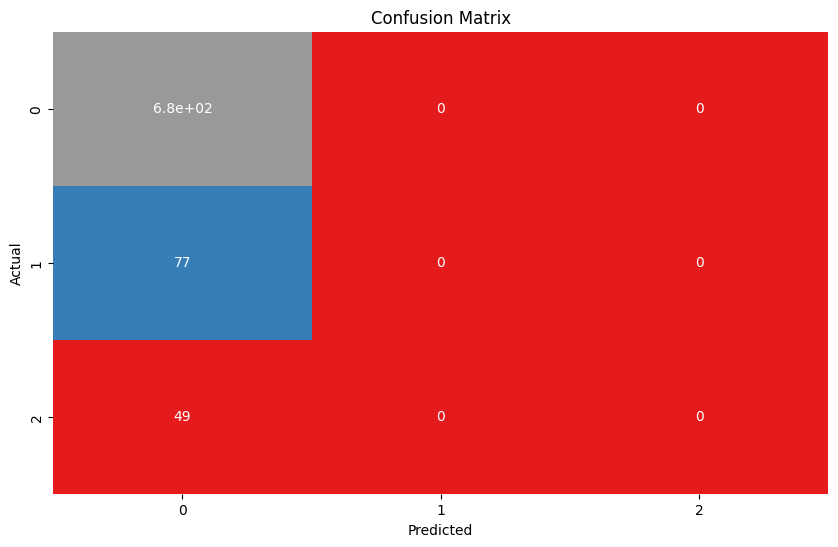

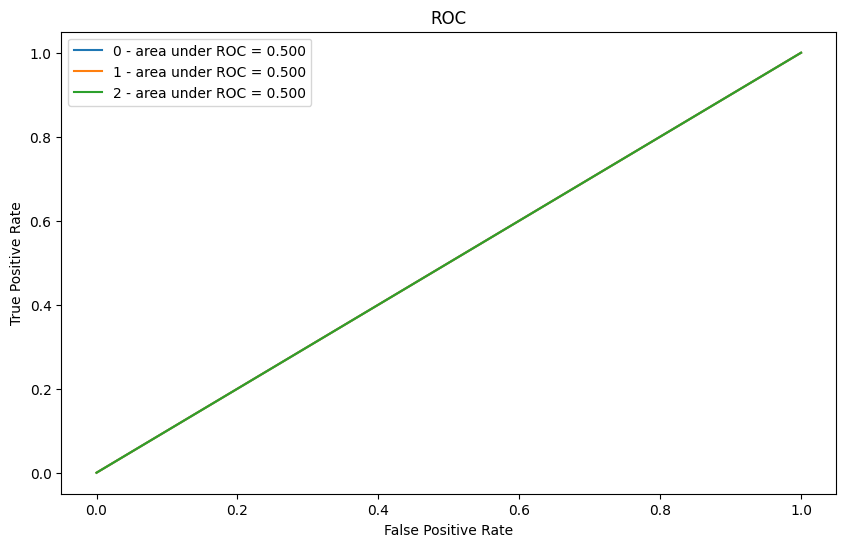

In [27]:
dmc = DummyClassifier(strategy="most_frequent")
dmc.fit(X_train_scaled, y_train)

model_scoring = model_eval(dmc, X_test_scaled, y_test)

scores = {}
scores["Dummy Classifier | Multi"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}

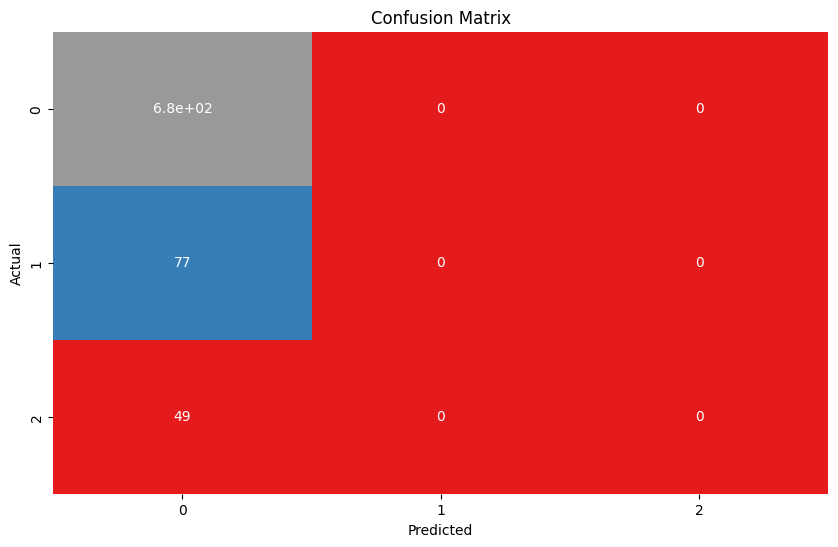

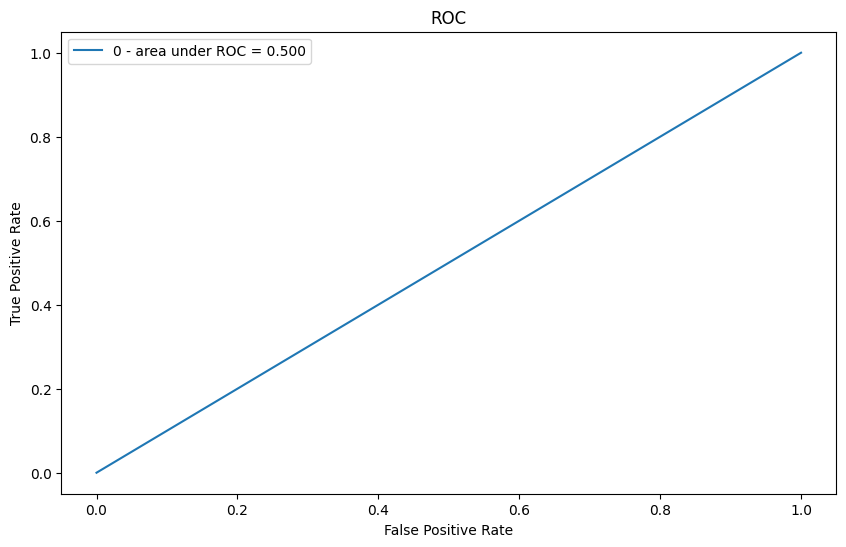

In [28]:
dmc = DummyClassifier(strategy="most_frequent")
dmc.fit(X_train_scaled, y_train)

model_scoring = model_eval(dmc, X_test_scaled, y_test, multi=False)

scores["Dummy Classifier | Binary"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}

# K-Nearest Neighbor

In [23]:
knn_params = {
    'clf__n_neighbors': [3, 5, 11, 17], # Try not to put even numbers
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan'],
}

knn = Modeler(KNeighborsClassifier, X_train_scaled, y_train, X_cv, y_cv, knn_params, scale=True)

Best Parameters for model: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


K-Nearest Neighbor | Multi
Accuracy: 0.8486352357320099
ROC: 0.5630345939129245
F1-Score: 0.444136349701492


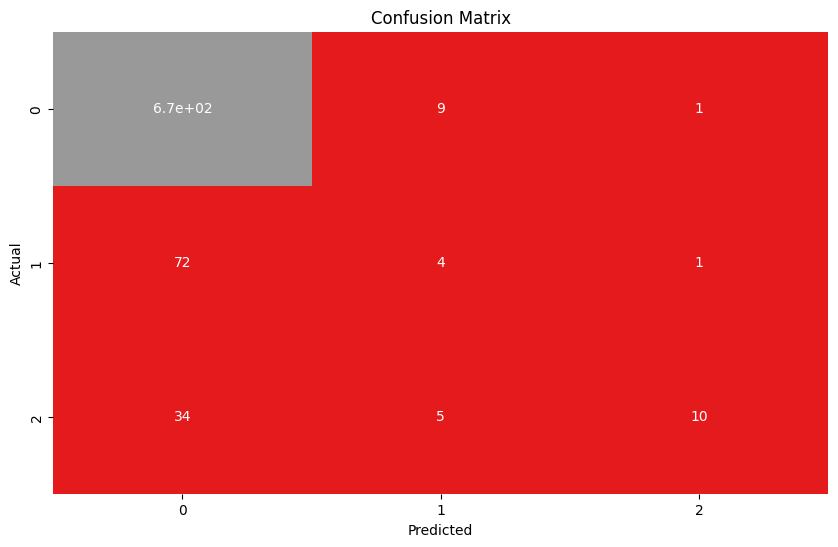

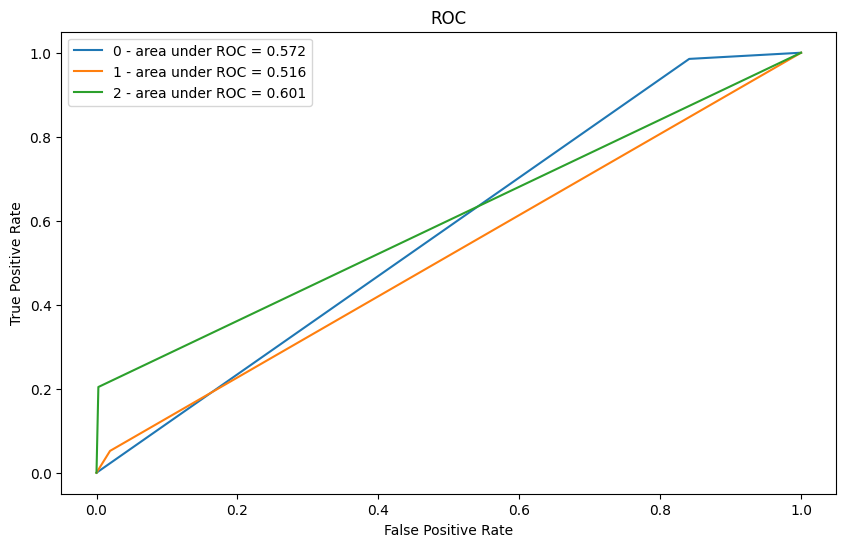

In [29]:
# Evaluate the KNN model
model_scoring = model_eval(knn["model"], X_test_scaled, y_test)

# Store scores for KNN
scores["K-Nearest Neighbor | Multi"] = {
    "Accuracy": model_scoring[0],
    "ROC": model_scoring[1],
    "F1-Score": model_scoring[2]
}

# Print the scores for KNN
print("K-Nearest Neighbor | Multi")
print("Accuracy:", scores["K-Nearest Neighbor | Multi"]["Accuracy"])
print("ROC:", scores["K-Nearest Neighbor | Multi"]["ROC"])
print("F1-Score:", scores["K-Nearest Neighbor | Multi"]["F1-Score"])


# K-Means

In [31]:
kmeans_params = {
    'clf__max_iter': [200, 500, 1000], # Try not to put even numbers
    'clf__n_init': [10, 30]
}

kmeans = Modeler(KMeans, X_train_scaled, y_train, X_cv, y_cv, kmeans_params, scale=True)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for model: {'max_iter': 200, 'n_init': 10}


K-Means | Multi:
Accuracy: 0.6501240694789082
ROC: 0.532689499445535
F1 Score: 0.14787641572285146


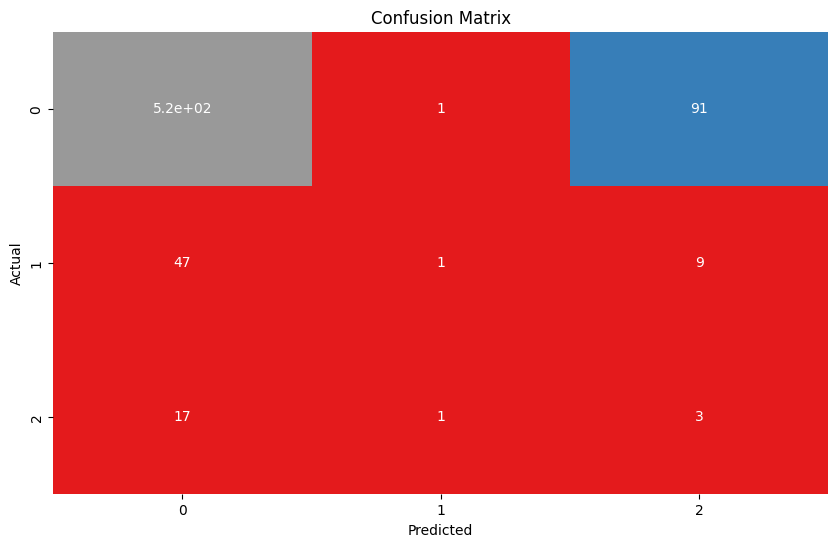

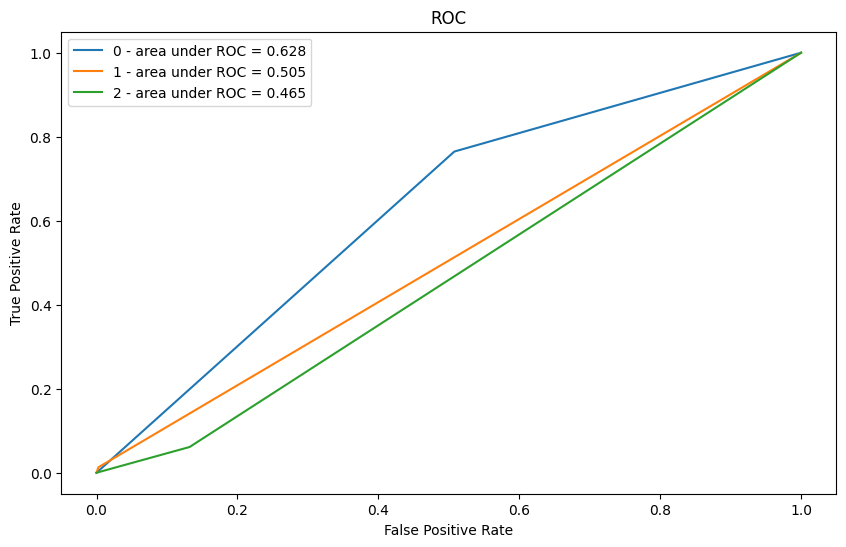

In [32]:
# Assume model_eval function returns accuracy, ROC AUC, and F1 Score
model_scoring = model_eval(kmeans["model"], X_test_scaled, y_test)

# Extract the scores
accuracy = model_scoring[0]
roc_auc = model_scoring[1]
f1_score = model_scoring[2]

# Store the scores in the dictionary
scores["K-Means | Multi"] = {"Accuracy": accuracy,
                             "ROC": roc_auc,
                             "F1-Score": f1_score}

# Print the scores
print("K-Means | Multi:")
print("Accuracy:", accuracy)
print("ROC:", roc_auc)
print("F1 Score:", f1_score)


# Random Forest Classifier




In [33]:
rfc_params = {
    'clf__n_estimators'      : [200, 500, 1000],
    'clf__max_depth'         : [10, 20, 50],
    'clf__max_features': [1.0, 0.7, 0.4],
    'clf__criterion' :['gini', 'entropy']
}

rfc = Modeler(RandomForestClassifier, X_train_scaled, y_train, X_cv, y_cv, rfc_params, scale=True)

Best Parameters for model: {'criterion': 'gini', 'max_depth': 20, 'max_features': 0.4, 'n_estimators': 500}


Random Forest | Multi:
Accuracy: 0.8511166253101737
ROC: 0.5672725742513184
F1 Score: 0.45758437432463017


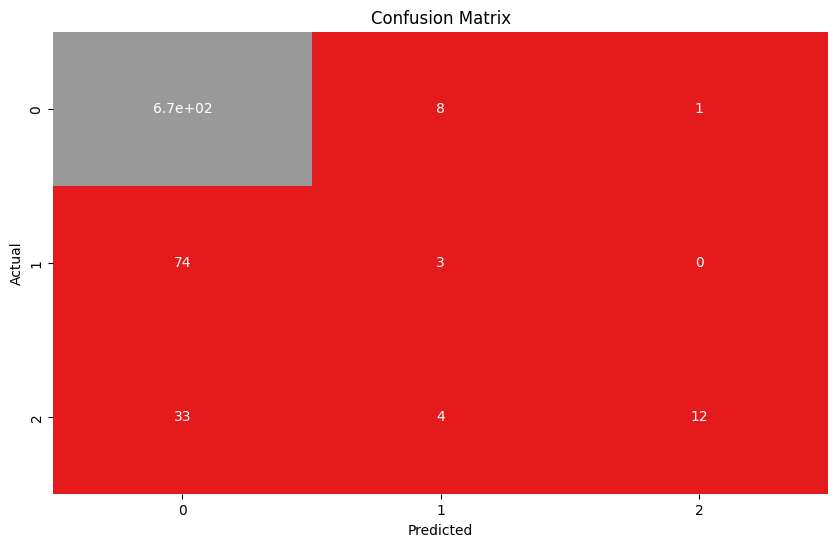

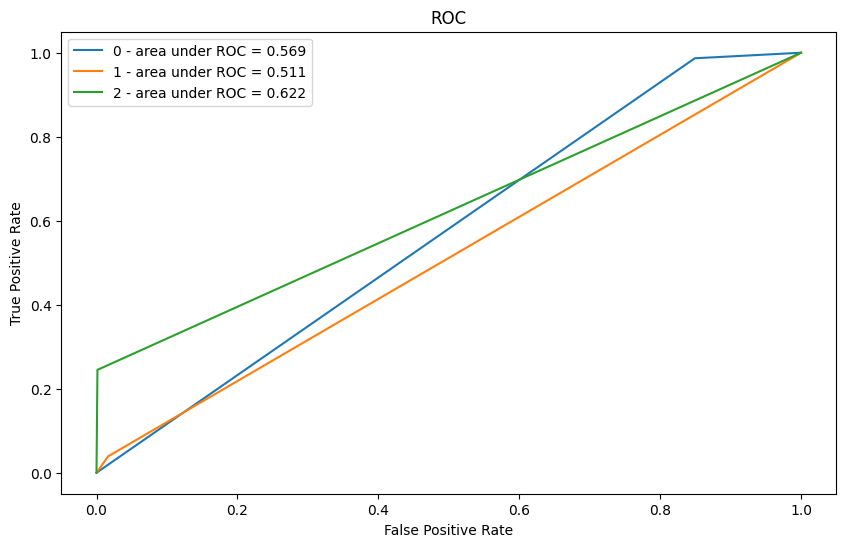

In [34]:
from sklearn.metrics import f1_score  # Ensure correct function import

# Run model evaluation
model_scoring = model_eval(rfc["model"], X_test_scaled, y_test)

# Extract individual scores
accuracy = model_scoring[0]
roc_auc = model_scoring[1]
f1 = model_scoring[2]  # Rename to avoid conflict with the function name

# Store the scores in the dictionary
scores["Random Forest | Multi"] = {"Accuracy": accuracy,
                                   "ROC": roc_auc,
                                   "F1-Score": f1}

# Print the scores
print("Random Forest | Multi:")
print("Accuracy:", accuracy)
print("ROC:", roc_auc)
print("F1 Score:", f1)
